In [92]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.stats import pearsonr 

In [65]:
g1 = pd.read_csv("train_preprocessed.csv") # offline data
g2 = pd.read_csv("test_preprocessed.csv") # online data
# for col in g1.columns:
#     print(col)
numeric_features = ['enroll_gest_age', 'g', 'p', 's', 'l', 'a'] # what about stage?
class_based_features = ['ChannelType_0', 'ChannelType_1', 'ChannelType_2', 
                        'education_1', 'education_2', 'education_3',  
                        'education_4', 'education_5', 'education_6', 
                        'education_7', 
                        'phone_owner_0', 'phone_owner_1', 'phone_owner_2', 
                        'income_bracket_-1', 'income_bracket_0', 'income_bracket_1', # income bracket -1?
                        'income_bracket_2', 'income_bracket_3', 'income_bracket_4',
                        'income_bracket_5', 'income_bracket_6' , 
                        'age_0', 'age_1', 'age_2', 'age_3', 'age_4'] # age was numeric before

In [66]:
# Print mean, variance and t-test for difference in means
# print('NUMERIC FEATURES STATS')
for f in numeric_features:
    print('-'*60)
    print('Feature {}'.format(f))
    print('G1: Mean - {}, Std - {}'.format(g1[f].mean(), g1[f].std()))
    print('G2: Mean - {}, Std - {}'.format(g2[f].mean(), g2[f].std()))
#     print('t test p-val: ', stats.ttest_ind(g1[f], g2[f])[1])

------------------------------------------------------------
Feature enroll_gest_age
G1: Mean - 20.5954669161422, Std - 9.298011412947808
G2: Mean - 20.958976758695993, Std - 9.102273980932603
------------------------------------------------------------
Feature g
G1: Mean - 1.584580711005273, Std - 0.8522279831270339
G2: Mean - 1.595327227755866, Std - 0.8132530097797639
------------------------------------------------------------
Feature p
G1: Mean - 0.6794948120428644, Std - 0.841597470463614
G2: Mean - 0.6702319673774985, Std - 0.8258327764193716
------------------------------------------------------------
Feature s
G1: Mean - 0.007824459942167036, Std - 0.11856400336854059
G2: Mean - 0.01025023954364151, Std - 0.12616132527569143
------------------------------------------------------------
Feature l
G1: Mean - 0.6455179452287804, Std - 0.8252613189683986
G2: Mean - 0.6365733003543017, Std - 0.8095145802447656
------------------------------------------------------------
Feature a
G1

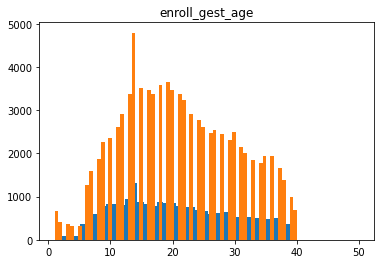

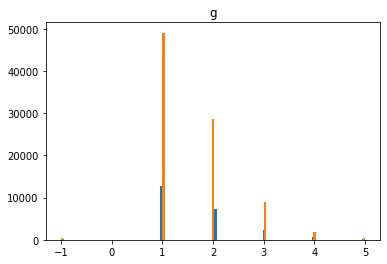

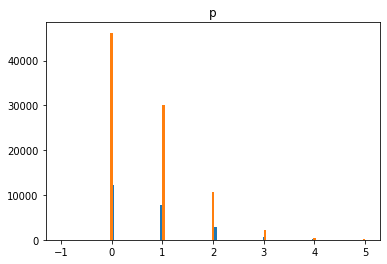

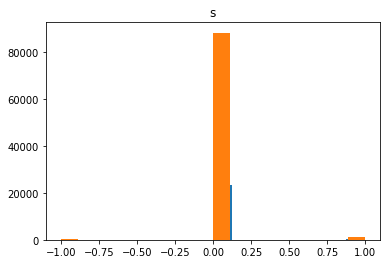

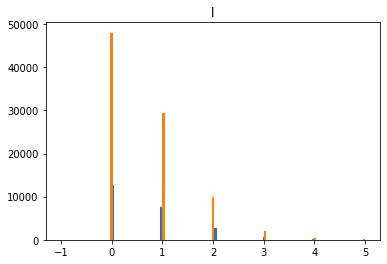

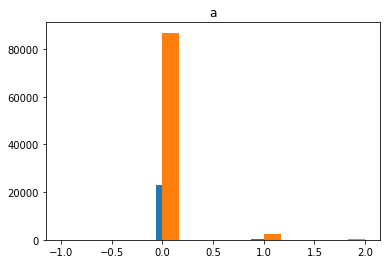

In [73]:
for f in numeric_features:
    plt.hist(g1[f], bins='auto')
    plt.hist(g2[f], bins='auto')
    plt.title("{}".format(f))
    plt.show()

In [93]:
BINS = [range(41), range(-1,6), range(-1,6), range(-1,2), range(-1,6), range(-1,3)]
i = 0
for f in numeric_features:
    h1 = np.histogram(g1[f], bins = BINS[i], density=True)
    h2 = np.histogram(g2[f], bins = BINS[i], density=True)
    print(f, ", W: ", wasserstein_distance(h1[0], h2[0]))
    print(f, ", P: ", pearsonr(h1[0], h2[0]))
    i += 1

enroll_gest_age , W:  0.0011363518882178706
enroll_gest_age , P:  (0.9663002792616312, 5.340214389168079e-24)
g , W:  0.003452885373978852
g , P:  (0.9998115915377026, 5.3243278959783314e-08)
p , W:  0.00235408653522489
p , P:  (0.9998722112857669, 2.4493889836029147e-08)
s , W:  0.00026112840956373385
s , P:  (1.0, 1.0)
l , W:  0.002116256737628637
l , P:  (0.999896372498698, 1.610743212894134e-08)
a , W:  0.0043979673222435955
a , P:  (0.9999797354648696, 0.004052884029945104)


In [75]:
print('\n\nCLASS FEATURES STATS')
for f in class_based_features:
    print('-'*60)
    print('Feature {}'.format(f))
    print('G1: Mean - {}, Std - {}'.format(g1[f].mean(), g1[f].std()))
    print('G2: Mean - {}, Std - {}'.format(g2[f].mean(), g2[f].std()))
    print('t test p-val: ', stats.ttest_ind(g1[f], g2[f])[1])



CLASS FEATURES STATS
------------------------------------------------------------
Feature ChannelType_0
G1: Mean - 0.7200204116346317, Std - 0.4489984313260953
G2: Mean - 0.7576152594870423, Std - 0.42852820686219456
t test p-val:  2.096205551779254e-32
------------------------------------------------------------
Feature ChannelType_1
G1: Mean - 0.27997958836536824, Std - 0.4489984313260953
G2: Mean - 0.12807228647191213, Std - 0.33417214141766294
t test p-val:  0.0
------------------------------------------------------------
Feature ChannelType_2
G1: Mean - 0.0, Std - 0.0
G2: Mean - 0.11431245404104552, Std - 0.3181921509618836
t test p-val:  0.0
------------------------------------------------------------
Feature education_1
G1: Mean - 0.05098656234053411, Std - 0.21997497700015173
G2: Mean - 0.04747420727767008, Std - 0.21265208852191128
t test p-val:  0.025194658663574294
------------------------------------------------------------
Feature education_2
G1: Mean - 0.187574417417928

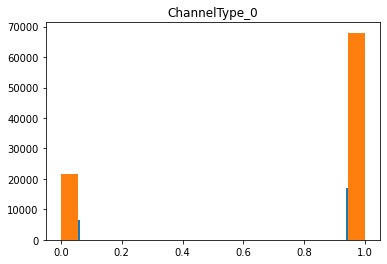

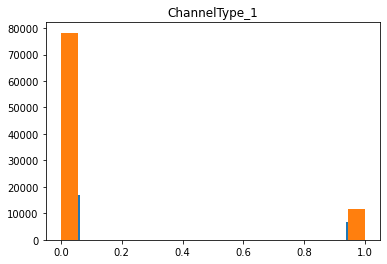

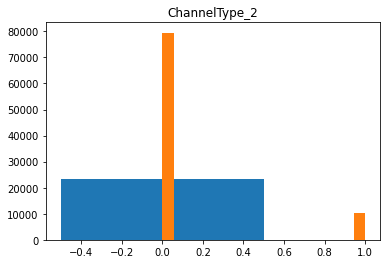

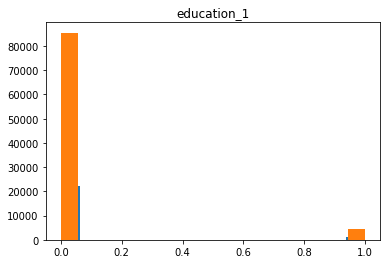

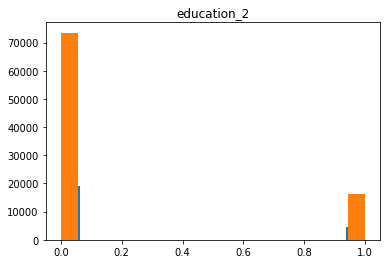

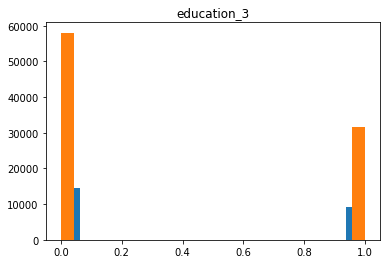

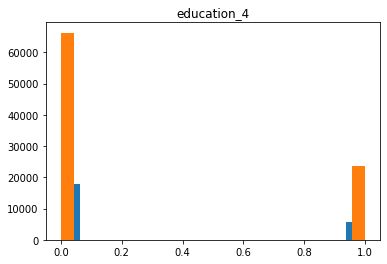

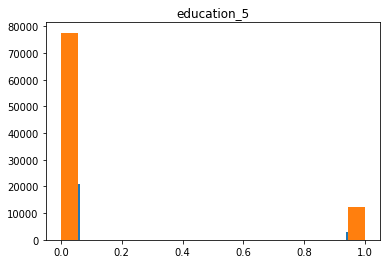

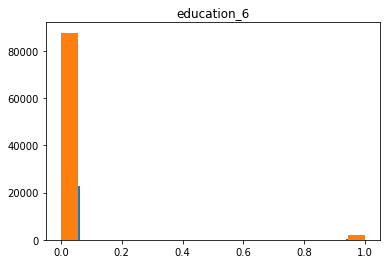

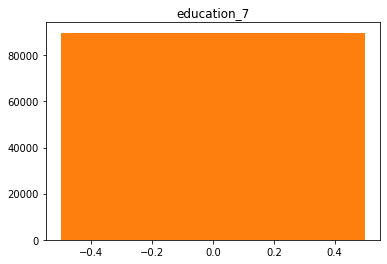

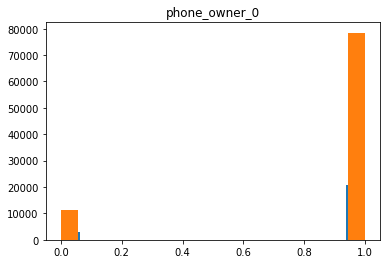

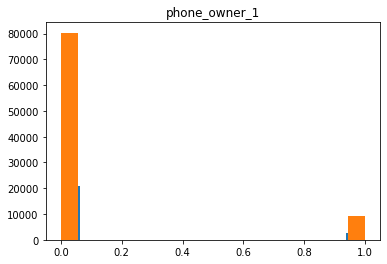

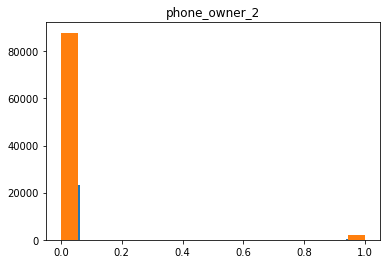

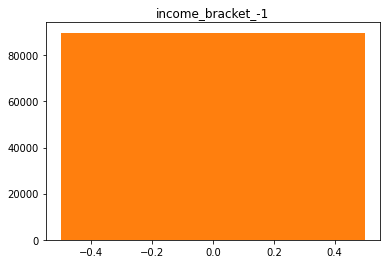

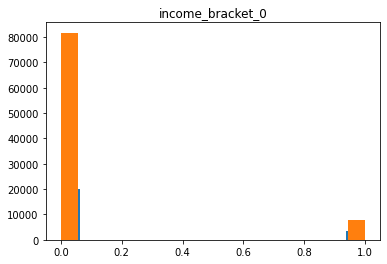

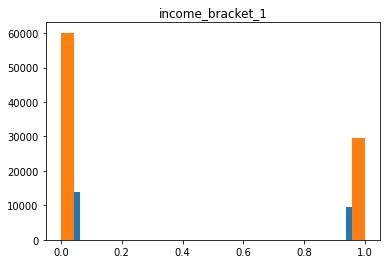

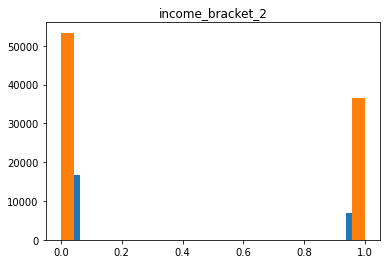

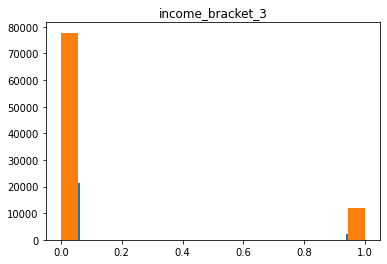

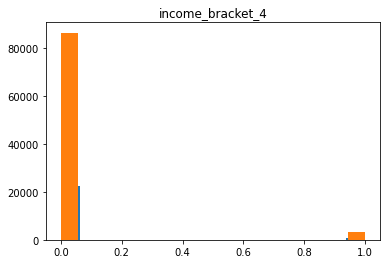

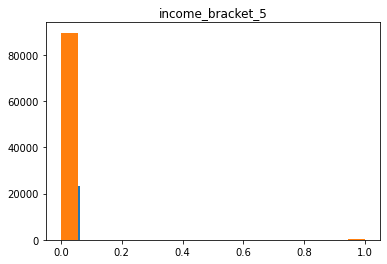

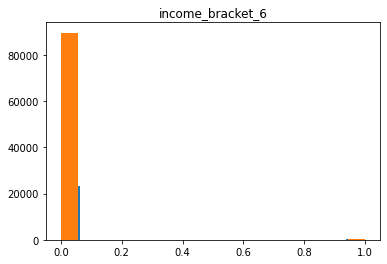

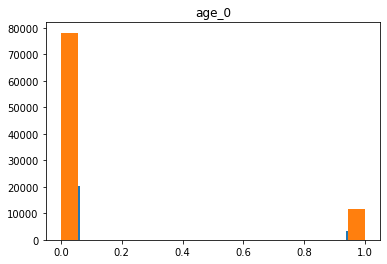

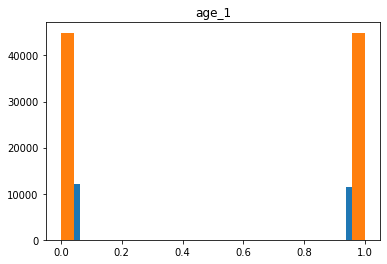

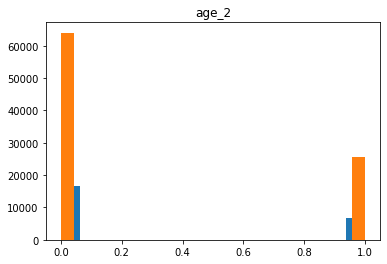

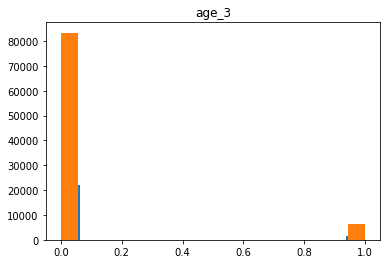

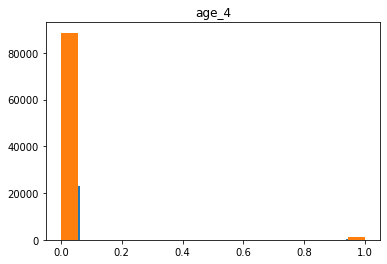

In [87]:
for f in class_based_features:
    plt.hist(g1[f], bins='auto')
    plt.hist(g2[f], bins='auto')
    plt.title("{}".format(f))
    plt.show()

In [95]:
i = 0
for f in class_based_features:
    h1 = np.histogram(g1[f], bins = [0,1], density=True)
    h2 = np.histogram(g2[f], bins = [0,1], density=True)
    print(f, ", W: ", wasserstein_distance(h1[0], h2[0]))
#     print(f, ", P: ", pearsonr(h1[0], h2[0]))
    i += 1

ChannelType_0 , W:  0.0
ChannelType_1 , W:  0.0
ChannelType_2 , W:  0.0
education_1 , W:  0.0
education_2 , W:  0.0
education_3 , W:  0.0
education_4 , W:  0.0
education_5 , W:  0.0
education_6 , W:  0.0
education_7 , W:  0.0
phone_owner_0 , W:  0.0
phone_owner_1 , W:  0.0
phone_owner_2 , W:  0.0
income_bracket_-1 , W:  0.0
income_bracket_0 , W:  0.0
income_bracket_1 , W:  0.0
income_bracket_2 , W:  0.0
income_bracket_3 , W:  0.0
income_bracket_4 , W:  0.0
income_bracket_5 , W:  0.0
income_bracket_6 , W:  0.0
age_0 , W:  0.0
age_1 , W:  0.0
age_2 , W:  0.0
age_3 , W:  0.0
age_4 , W:  0.0


In [77]:
#######  OLD CODE  ########
# import scipy.stats as stats
# import pandas as pd

# # Load feature datasets for the two groups
# pilot_pd_data = pd.read_csv("feb16-mar15_data/beneficiary/ai_registration-20210216-20210315.csv", sep='\t')
# old_pd_data = pd.read_csv('may_data/beneficiary/AIRegistration-20200501-20200731.csv')

# # Define categorical Features
# class_based_features = ['ChannelType', 'education', 'phone_owner', 'income_bracket']

# # Create on-hot encoding of categorical variables
# dummy = pd.get_dummies(old_pd_data[class_based_features], columns = class_based_features)
# old_pd_data = pd.concat([old_pd_data.drop(columns = class_based_features), dummy], axis=1)

# # Combine some categorical features
# old_pd_data['phone_owner_family'] = old_pd_data['phone_owner_family'] + old_pd_data['phone_owner_Sister']
# old_pd_data['phone_owner_neighbor'] = old_pd_data['phone_owner_Nabair ']

# # Create on-hot encoding of categorical variables for other group
# dummy = pd.get_dummies(pilot_pd_data[class_based_features], columns = class_based_features)
# pilot_pd_data = pd.concat([pilot_pd_data.drop(columns = class_based_features), dummy], axis=1)

# g1 = pilot_pd_data
# g2 = old_pd_data

# # Define features
# numeric_features = ['enroll_gest_age', 'stage', 'age', 'g', 'p', 's', 'l', 'a']
# date_based_features = ['lmp', 'registration_date']
# class_based_features = dummy.columns

# feat_sig_df = pd.DataFrame(columns = ['Feature', 'RMAB Group Mean','Round Robin Group Mean', 'Control Group Mean', 'Joint p-value'])


# # Print mean, variance and t-test for difference in means
# print('NUMERIC FEATURES STATS')
# for f in numeric_features:
#     print('-'*60)
#     print('Feature {}'.format(f))
#     print('G1: Mean - {}, Std - {}'.format(g1[f].mean(), g1[f].std()))
#     print('G2: Mean - {}, Std - {}'.format(g2[f].mean(), g2[f].std()))
#     print('t test p-val: ', stats.ttest_ind(g1[f], g2[f])[1])

    
# print('\n\nCLASS FEATURES STATS')
# for f in class_based_features:
#     if f not in g1.columns or f not in g2.columns:
#         continue
#     print('-'*60)
#     print('Feature {}'.format(f))
#     print('G1: Mean - {}, Std - {}'.format(g1[f].mean(), g1[f].std()))
#     print('G2: Mean - {}, Std - {}'.format(g2[f].mean(), g2[f].std()))
#     print('t test p-val: ', stats.ttest_ind(g1[f], g2[f])[1])
